# Import required libaries

In [66]:
import pandas as pd
import numpy as np
import datetime as dt
import missingno as msno

# Import dataset

In [67]:
path = "./data/raw/Amazon Sale Report.csv"
df = pd.read_csv(path)

df.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17032\3605741257.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [69]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


# Data cleaning

<Axes: >

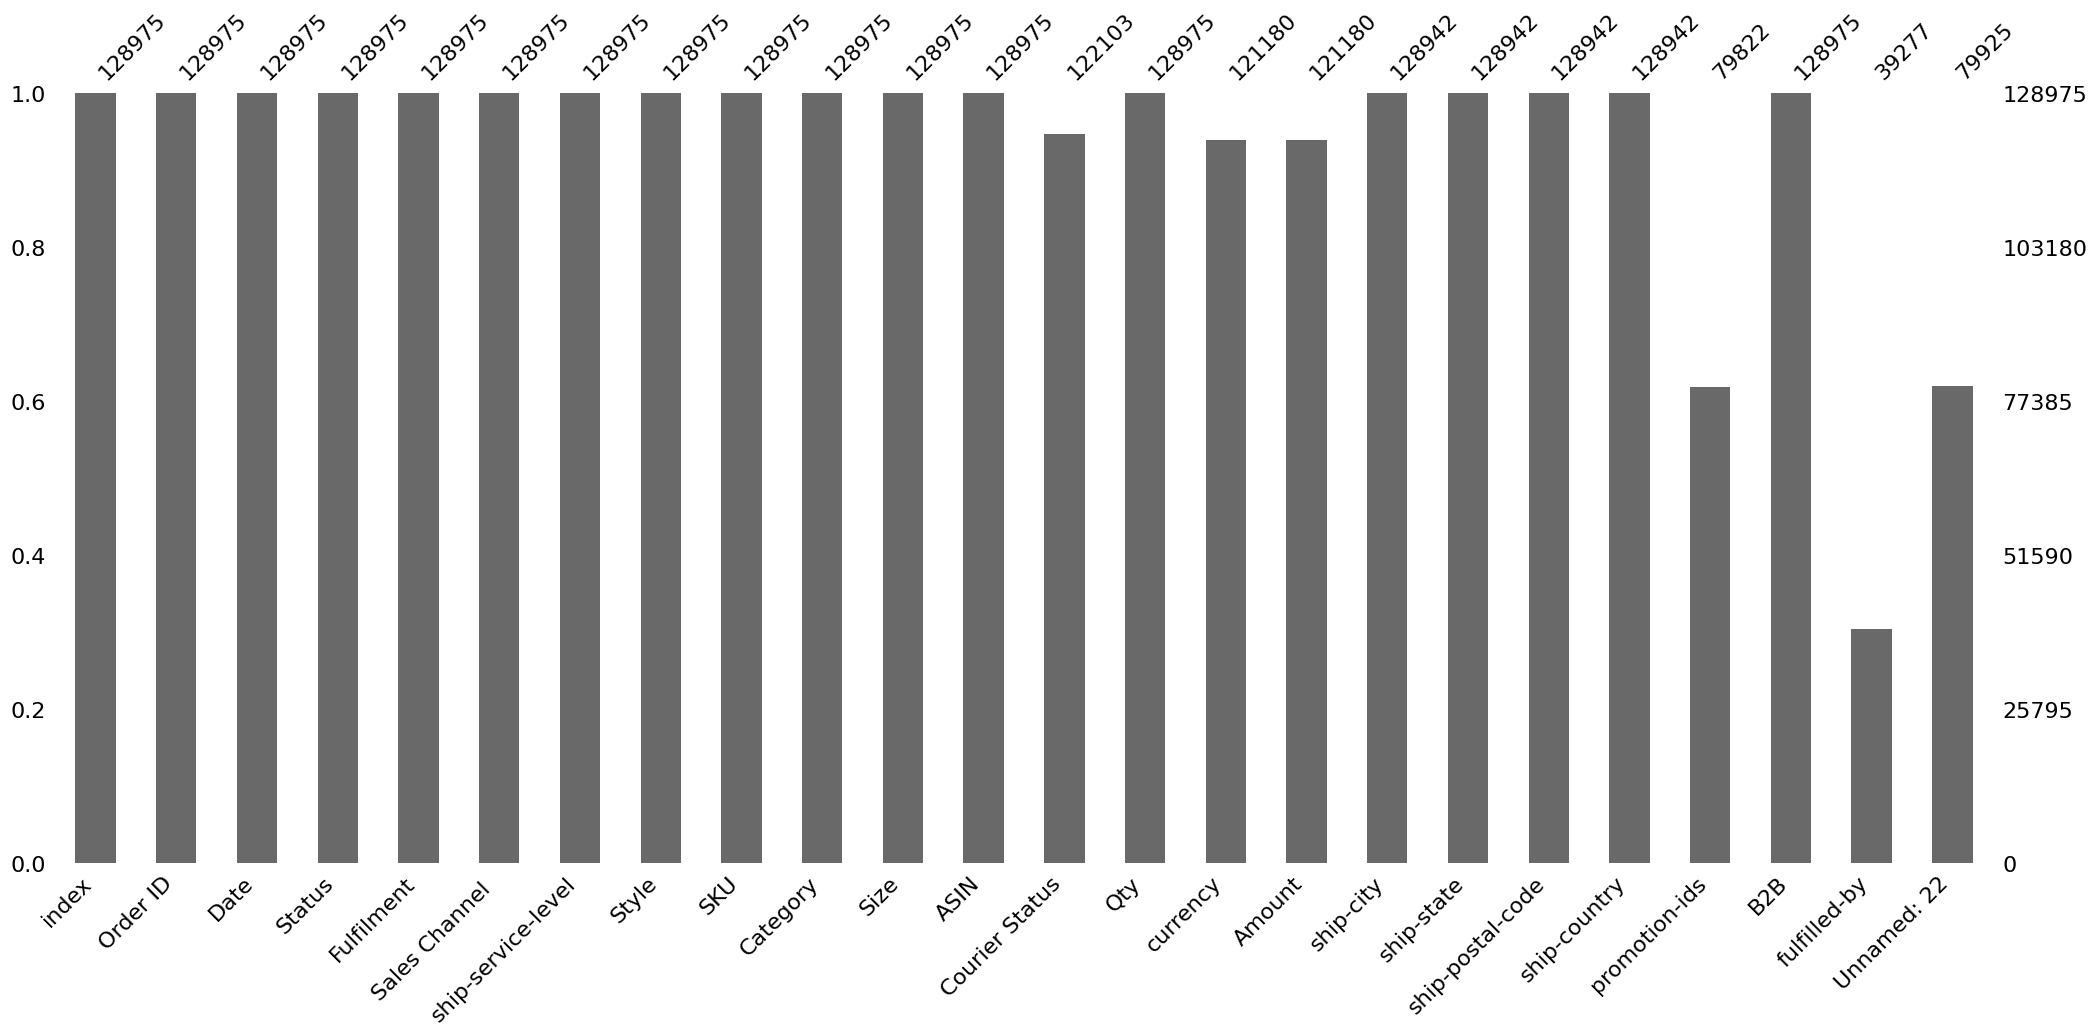

In [70]:
%matplotlib inline
msno.bar(df)

In [71]:
# msno.heatmap(df)

In [72]:
# msno.matrix(df)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17032\3645194389.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


<Axes: >

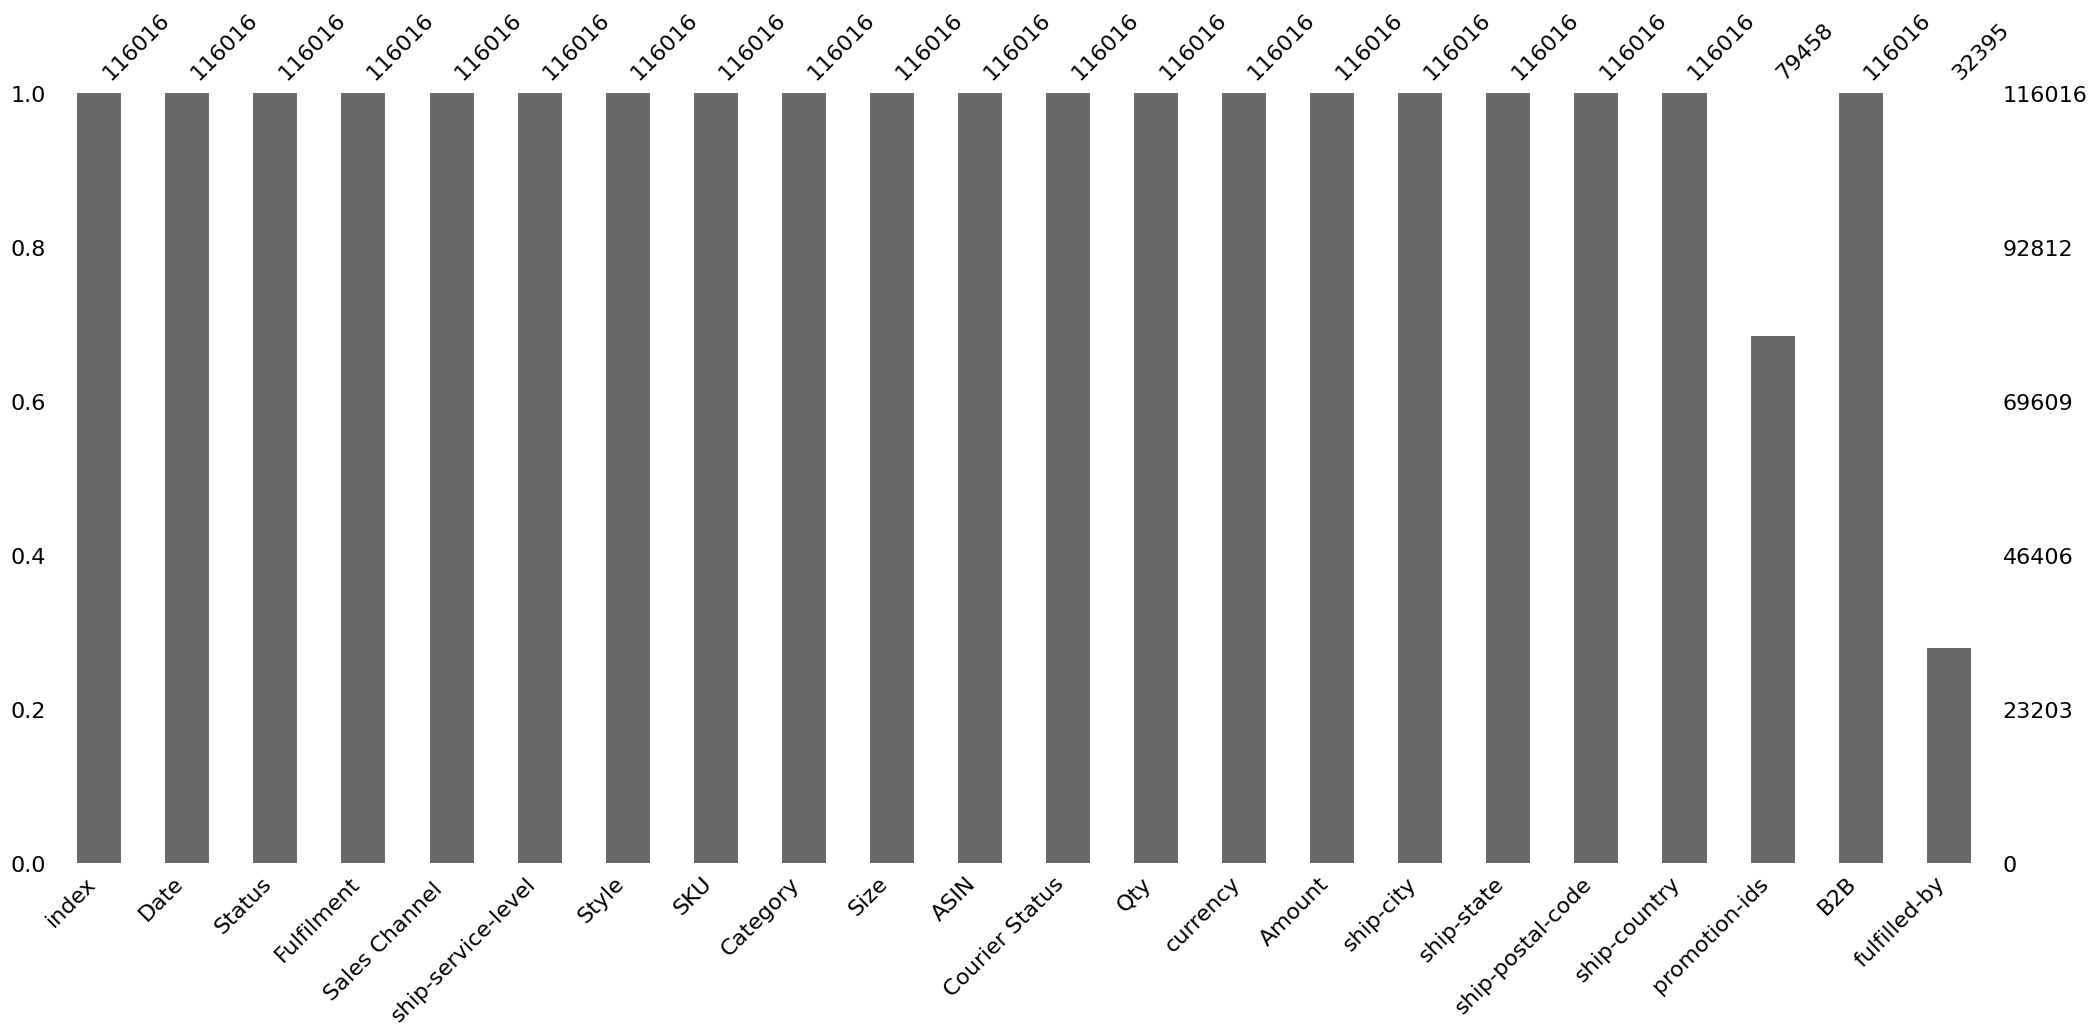

In [73]:
df.drop(columns=['Order ID', 'Unnamed: 22'], inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].apply(lambda x: x.toordinal())
df.drop_duplicates(inplace=True)
df.dropna(subset=['Courier Status', 'currency', 'Amount', 'ship-postal-code'], inplace=True)
msno.bar(df)

<Axes: >

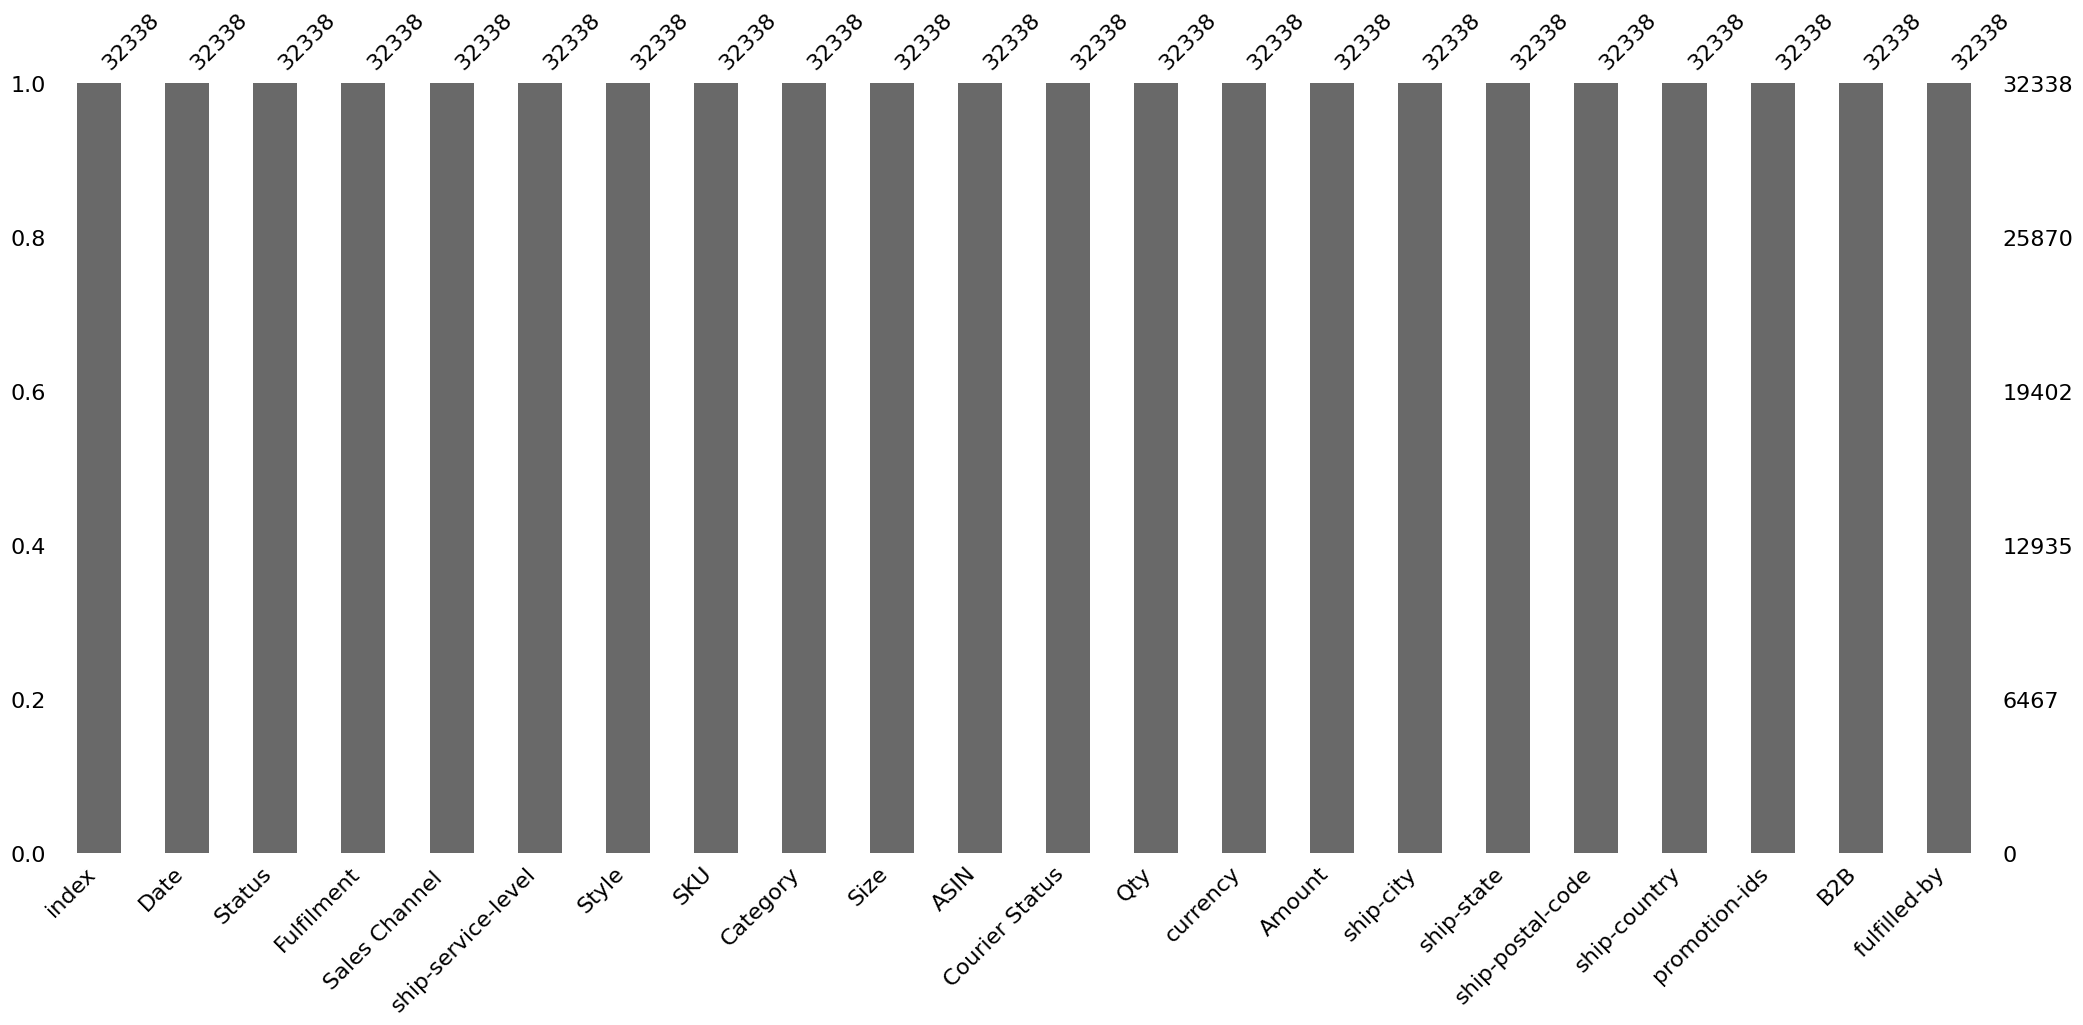

In [74]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 
            'Style', 'SKU', 'Category', 'Size', 'currency', 
            'ship-city', 'ship-state', 'ship-country', 'B2B',]:
    df[col] = le.fit_transform(df[col])

df2 = df.drop(columns=['promotion-ids','fulfilled-by'])
df.dropna(subset=['promotion-ids', 'fulfilled-by'], inplace=True)

for col in ['promotion-ids', 'fulfilled-by']:
    df[col] = le.fit_transform(df[col])

df.head()
msno.bar(df)

In [77]:
df2.head()

,index,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
1,1,738275,5,1,0,1,845,4389,8,0,B09K3WFS32,Shipped,1,0,406.0,734,22,560085.0,0,0
2,2,738275,3,0,0,0,531,2596,8,8,B07WV4JV4D,Shipped,1,0,329.0,5076,27,410210.0,0,1
4,4,738275,3,0,0,0,752,3791,6,0,B098714BZP,Shipped,1,0,574.0,1385,54,600073.0,0,0
5,5,738275,3,0,0,0,1230,6215,5,8,B08YN7XDSG,Shipped,1,0,824.0,2368,57,201102.0,0,0
6,6,738275,3,0,0,0,180,652,5,5,B08CMHNWBN,Shipped,1,0,653.0,1334,9,160036.0,0,0


<Axes: >

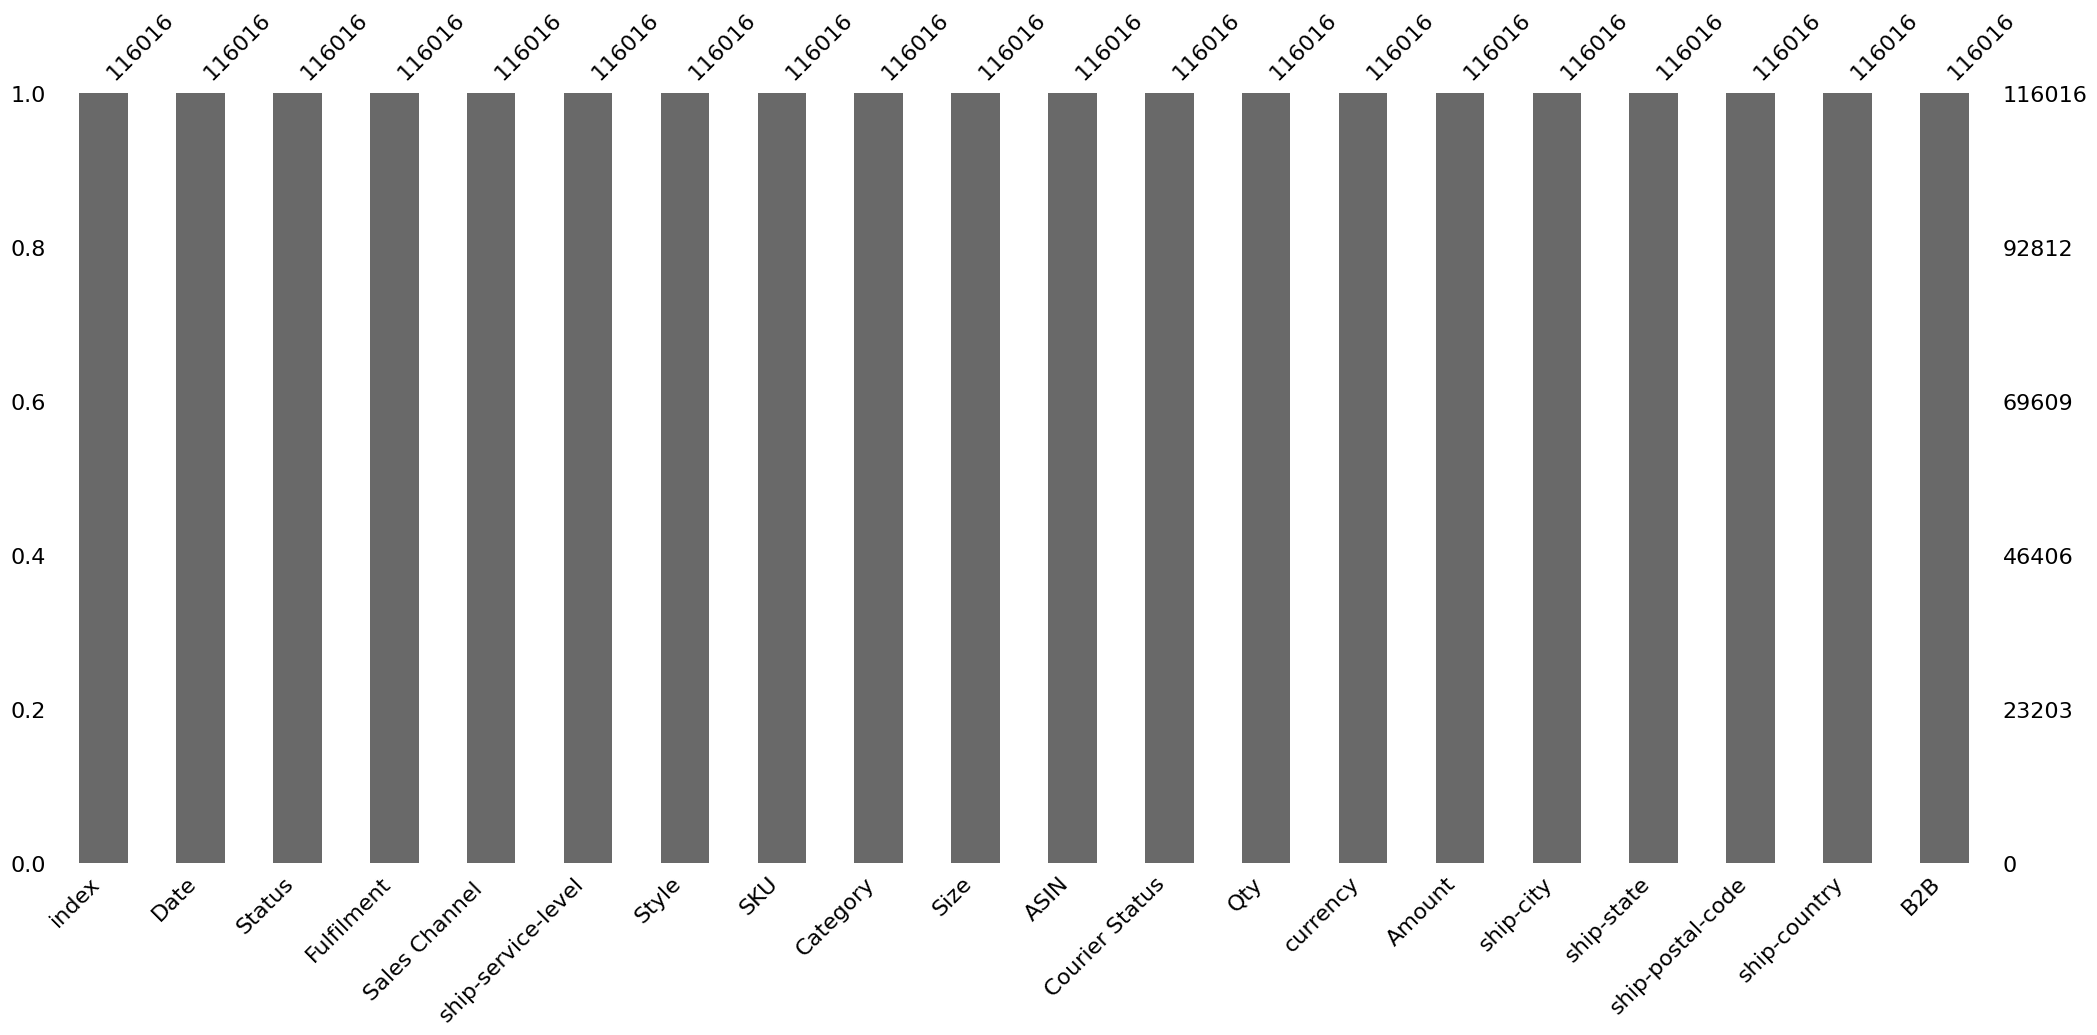

In [75]:
msno.bar(df2)